In [1]:
%load_ext sql
%config SqlMagic.autocommit = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%sql sqlite:///../db/diamonds_m2.db

'Connected: @../repo/ih_datamadpt1121_project_m2/db/diamonds_m2.db'

In [4]:
%%sql tables <<
SELECT
    name
FROM
    sqlite_master
WHERE
    type ='table' AND
    name NOT LIKE 'sqlite_%';

 * sqlite:///../repo/ih_datamadpt1121_project_m2/db/diamonds_m2.db
Done.
Returning data to local variable tables


In [5]:
tables.DataFrame()

,name
0,diamonds_dimensions
1,diamonds_transactional
2,diamonds_properties
3,diamonds_cut
4,diamonds_color
5,diamonds_clarity
6,diamonds_city


In [6]:
%%sql arranged_dataframe <<

SELECT diamonds_properties.index_id, cut, color, clarity, depth, carat, diamonds_dimensions.'table', x, y, z, price, city  FROM diamonds_properties
INNER JOIN diamonds_cut
ON diamonds_cut.cut_id = diamonds_properties.cut_id
INNER JOIN diamonds_color
ON diamonds_color.color_id = diamonds_properties.color_id
INNER JOIN diamonds_clarity
ON diamonds_clarity.clarity_id = diamonds_properties.clarity_id
INNER JOIN diamonds_dimensions
ON diamonds_dimensions.index_id = diamonds_properties.index_id
INNER JOIN diamonds_transactional
ON diamonds_transactional.index_id = diamonds_properties.index_id
INNER JOIN diamonds_city
ON diamonds_city.city_id = diamonds_transactional.city_id

 * sqlite:///../repo/ih_datamadpt1121_project_m2/db/diamonds_m2.db
Done.
Returning data to local variable arranged_dataframe


In [7]:
final_dframe = arranged_dataframe.DataFrame()
final_dframe

,index_id,cut,color,clarity,depth,carat,table,x,y,z,price,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,Premium,J,VS2,62.4,1.21,58.0,6.83,6.79,4.25,4268,Dubai
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,Very Good,H,VS2,63.0,0.32,57.0,4.35,4.38,2.75,505,Kimberly
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,Fair,G,VS1,65.5,0.71,55.0,5.62,5.53,3.65,2686,Las Vegas
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,Good,D,SI1,63.8,0.41,56.0,4.68,4.72,3.00,738,Kimberly
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,Ideal,G,SI1,60.5,1.02,59.0,6.55,6.51,3.95,4882,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,Ideal,G,VS1,62.7,1.34,57.0,7.10,7.04,4.43,10070,Antwerp
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,Good,F,SI2,57.1,2.02,60.0,8.31,8.25,4.73,12615,Madrid
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,Ideal,H,SI1,62.7,1.01,56.0,6.37,6.42,4.01,5457,Kimberly
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,Ideal,J,VS1,61.9,0.33,54.3,4.45,4.47,2.76,456,Kimberly


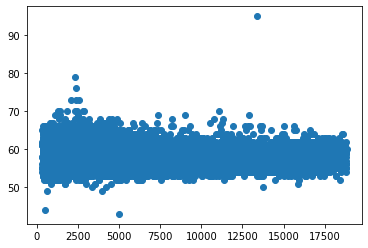

In [8]:
x = final_dframe['price']
y = final_dframe['table']
plt.scatter(x, y)
plt.show()

In [9]:
final_dframe

,index_id,cut,color,clarity,depth,carat,table,x,y,z,price,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,Premium,J,VS2,62.4,1.21,58.0,6.83,6.79,4.25,4268,Dubai
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,Very Good,H,VS2,63.0,0.32,57.0,4.35,4.38,2.75,505,Kimberly
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,Fair,G,VS1,65.5,0.71,55.0,5.62,5.53,3.65,2686,Las Vegas
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,Good,D,SI1,63.8,0.41,56.0,4.68,4.72,3.00,738,Kimberly
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,Ideal,G,SI1,60.5,1.02,59.0,6.55,6.51,3.95,4882,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,Ideal,G,VS1,62.7,1.34,57.0,7.10,7.04,4.43,10070,Antwerp
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,Good,F,SI2,57.1,2.02,60.0,8.31,8.25,4.73,12615,Madrid
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,Ideal,H,SI1,62.7,1.01,56.0,6.37,6.42,4.01,5457,Kimberly
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,Ideal,J,VS1,61.9,0.33,54.3,4.45,4.47,2.76,456,Kimberly


In [10]:
final_dframe['volume'] = final_dframe['x'] * final_dframe['z'] * final_dframe['y']
len(final_dframe)
final_dframe['density'] = final_dframe['carat'] / final_dframe['volume']

In [11]:
final_dframe = final_dframe.drop(final_dframe.index[[14708]])
final_dframe.sort_values(by="volume", ascending=False)
len(final_dframe)

40454

In [12]:
final_dframe.describe()

,depth,carat,table,x,y,z,price,volume,density
count,40454.000000,40454.000000,40454.000000,40454.000000,40454.000000,40454.000000,40454.000000,40454.000000,4.045400e+04
mean,61.752912,0.797676,57.446144,5.729333,5.731504,3.537042,3928.239754,129.710531,inf
std,1.431673,0.475513,2.233562,1.124405,1.115777,0.696707,3992.253156,76.717606,NaN
min,43.000000,0.200000,43.000000,0.000000,0.000000,0.000000,326.000000,0.000000,2.847241e-03
25%,61.000000,0.400000,56.000000,4.710000,4.720000,2.910000,945.000000,64.889265,6.047862e-03
50%,61.800000,0.700000,57.000000,5.690000,5.710000,3.520000,2397.000000,114.688817,6.116874e-03
75%,62.500000,1.040000,59.000000,6.540000,6.540000,4.030000,5330.750000,170.843744,6.190041e-03
max,79.000000,4.500000,95.000000,10.230000,10.160000,6.720000,18823.000000,698.455296,inf
